<a href="https://colab.research.google.com/github/javier1nc/infotec-Clasificacion-de-frutas/blob/main/Clasificacion_de_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checking number of classes

In [26]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!wget -N "https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas.zip"
!unzip -qo frutas.zip

--2022-12-02 22:32:33--  https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas.zip
Resolving infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)... 52.219.108.146
Connecting to infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)|52.219.108.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6423177 (6.1M) [application/zip]
Saving to: ‘frutas.zip’

frutas.zip          100%[===================>]   6.12M  12.0MB/s    in 0.5s    

2022-12-02 22:32:34 (12.0 MB/s) - ‘frutas.zip’ saved [6423177/6423177]



In [28]:
import os
chart_types = os.listdir(r'./frutas/')
print(chart_types)

['Banana', 'Orange', 'Blueberry']


## Loading images and their respective label

In [29]:

import cv2             # install and import opencv-python : a library with various image processing tool.
path = r"./frutas/"
im_size = 224

# In images list we store all the resized images
#The images which are resize and converted into 223 by 224

images = []

#Store the corresponding labels in the labels list

labels = []

#This loop will take us in a folder one by one
#The functionality in the second for loop is performed folder by folder
for i in chart_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]
# The Second loop here is performing the resizing concept     
    for f in filenames:        
            img=cv2.imread(data_path + '/' + f)
          #  print(img)
            try:
                img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_NEAREST)
                #print(img.shape)
            except:
                break
          #  height, width , layers = img.shape
          #  size=(width,height)
            #print(img.shape)
            #print(img)
            images.append(img)
            labels.append(i)
#print(labels)
#print(images)

## Transform the image array to a numpy type

In [30]:
import numpy as np
images = np.array(images)
#print(images)
print(images.shape)

(1431, 224, 224, 3)


## Encode the label

In [63]:
from sklearn.preprocessing import LabelEncoder    # intall sklearn and import - a library with various traditional machine 
                                                  # learning models

labels_labelencoder = LabelEncoder()
y = labels_labelencoder.fit_transform(labels)
#print(labels)
#print("Banana: 0, Orange : 1, Blueberry: 2 \n")
print(y)

[0 0 0 ... 1 1 1]


## Split data into training and testing set

In [32]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.18, random_state=42)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1173, 224, 224, 3)
(1173,)
(258, 224, 224, 3)
(258,)


## Model MLP

In [33]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

model = keras.Sequential([
keras.layers.Flatten(input_shape=(224,224,3)),
#keras.layers.Dropout(0.5),
keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h1"),
keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h2"),
keras.layers.Dense(250, activation=tf.nn.sigmoid, name="h3"),
keras.layers.Dense(50, activation=tf.nn.sigmoid, name="h4"),
keras.layers.Dense(3, activation=tf.nn.softmax)])

model.summary()

#model = Sequential()
#model.add(Flatten(input_shape=(224,224,3)))
#model.add(Dropout(0.2))
#model.add(Dense(256, activation=tf.nn.relu))
#model.add(Dense(50, activation=tf.nn.relu))
#model.add(Dense(3, activation=tf.nn.softmax))
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 h1 (Dense)                  (None, 256)               38535424  
                                                                 
 h2 (Dense)                  (None, 256)               65792     
                                                                 
 h3 (Dense)                  (None, 250)               64250     
                                                                 
 h4 (Dense)                  (None, 50)                12550     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 38,678,169
Trainable params: 38,678,169
No

## Set parameters to compile the model

In [34]:
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics=['accuracy'])
#model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentopy',metrics = ['accuracy'])

In [35]:
history = model.fit(train_x,train_y,epochs=100)
#history = model.fit(train_x, train_y, epochs=10, batch_size=250, verbose=3, validation_split=0.2)
#train_y = tf.one_hot(train_y, 10)
#history = model.fit(train_x, train_y, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, batch_size=2048, verbose=1, validation_split=1)

Epoch 1/100
37/37 [==============================] - 12s 275ms/step - loss: 1.1166 - accuracy: 0.3427
Epoch 2/100
37/37 [==============================] - 10s 281ms/step - loss: 1.0947 - accuracy: 0.3393
Epoch 3/100
37/37 [==============================] - 10s 256ms/step - loss: 1.0945 - accuracy: 0.3231
Epoch 4/100
37/37 [==============================] - 10s 271ms/step - loss: 1.0945 - accuracy: 0.3333
Epoch 5/100
37/37 [==============================] - 14s 368ms/step - loss: 1.0945 - accuracy: 0.3529
Epoch 6/100
37/37 [==============================] - 10s 258ms/step - loss: 1.0945 - accuracy: 0.3367
Epoch 7/100
37/37 [==============================] - 10s 261ms/step - loss: 1.0945 - accuracy: 0.3188
Epoch 8/100
37/37 [==============================] - 11s 292ms/step - loss: 1.0945 - accuracy: 0.3333
Epoch 9/100
37/37 [==============================] - 10s 262ms/step - loss: 1.0945 - accuracy: 0.3240
Epoch 10/100
37/37 [==============================] - 10s 260ms/step - loss: 1.094

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
#cv_scores = cross_val_score(model, train_x, train_y, cv=5)
#print("CV average score: %.2f" % cv_scores.mean())

pred_y_NN=model.predict(test_x)
#accuracy_score(test_y, pred_y_NN)
#cr = classification_report(test_y, pred_y_NN)
print(pred_y_NN)
#auc(test_y, pred_y_NN, round=True)

9/9 [==============================] - 1s 88ms/step
[[0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573 0.33333084 0.33333343]
 [0.33333573

Save the model

In [37]:
model.save('MLP_5.h9')

### Load the save model and test over a single dataset

In [ ]:
#pip install Flask-SQLAlchemy

In [38]:
from sqlalchemy.orm import mapper
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
model = tensorflow.keras.models.load_model('MLP_5.h9')

In [39]:
import matplotlib.pyplot as plt
import cv2 as cv
# Convertir la imagen a NumPy array
from matplotlib.image import imread
import numpy as np

In [44]:
!wget -N "https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas_pruebas.zip"
!unzip -qo frutas_pruebas.zip

--2022-12-02 22:55:52--  https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas_pruebas.zip
Resolving infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)... 52.219.141.10
Connecting to infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)|52.219.141.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2158814 (2.1M) [application/zip]
Saving to: ‘frutas_pruebas.zip’

frutas_pruebas.zip  100%[===================>]   2.06M  4.64MB/s    in 0.4s    

2022-12-02 22:55:53 (4.64 MB/s) - ‘frutas_pruebas.zip’ saved [2158814/2158814]



In [78]:
img = load_img('./frutas_pruebas/Banana/86_100.jpg', target_size=(224, 224))

print(type(img))

<class 'PIL.Image.Image'>


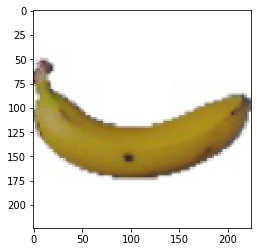

In [79]:
plt.imshow(img)
plt.show()

In [80]:
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
#print(img)

In [81]:

predict = model.predict(img)
classes=predict=np.argmax(predict,axis=1)
#move_name = mapper(predict)
#print("La predict is {}.".format(move_name))

1/1 [==============================] - 0s 169ms/step


In [82]:
if classes==0:
    print('Banana')
elif classes==1:
    print('Orange')

elif classes==2:
     print('Blueberry')


Banana


In [83]:
print(predict)

[0]
